In [2]:
import keras

Using TensorFlow backend.


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

/home/dan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [12]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
a=0

<h2> a mnist analysis </h2>

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)

1.12.0


In [68]:
#load the data
mnist = tf.keras.datasets.mnist

In [69]:
# assign train and test arrays
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [70]:
#look data
x_train[0][5:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

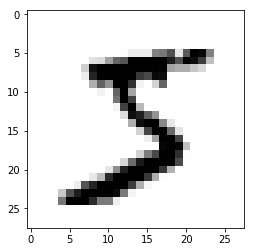

In [71]:
#visualize 
import matplotlib.pyplot as plt
plt.imshow(x_train[0] , cmap=plt.cm.binary)
plt.show()

In [16]:
print(y_train[0])

5


<p> <span style='color:purple'> show [1] in train set </span>

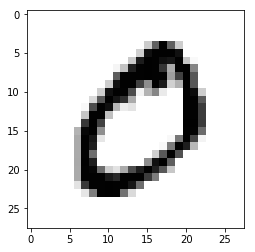

0


In [17]:
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()
print (y_train[1])

`arrayName = tf.keras.utils.normalize(arrayName, axis = 1)`

In [75]:
#normalize
x_train = tf.keras.utils.normalize(x_train, axis = 1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)


In [17]:
x_train[0][5:8]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00393124, 0.02332955, 0.02620568,
        0.02625207, 0.17420356, 0.17566281, 0.28629534, 0.05664824,
        0.51877786, 0.71632322, 0.77892406, 0.89301644, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05780486, 0.06524513,
        0.16128198, 0.22713296, 0.22277047, 0.32790981, 0.36833534,
        0.3689874 , 0.34978968, 0.32678448, 0.368094  , 0.3747499 ,
        0.79066747, 0.67980478, 0.61494005, 0.45002403, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12250613, 0.45858525, 0.45852825,
        0.43408872, 0.37314701, 0.33153488, 0.32790981, 0.36833534,
        0.3689874 , 0.3497

<h3> initialize model </h3>

`model = tf.keras.models.Sequential()`

In [76]:
#build model
model = tf.keras.models.Sequential()

<h3> Layers </h3>

In [77]:
#using a flatten layer with keras
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape)) #input layer

In [78]:
#first hidden layer
#Dense layer = fully connected
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#adding another identical layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))


In [79]:
#output layer
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))

<h3>Compile </h3>
optimize / train the model

`model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])  `

In [80]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])  

<h3>Fit </h3>

In [81]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s 121us/step - loss: 0.2617 - acc: 0.9232
Epoch 2/3
60000/60000 [==============================] - 7s 110us/step - loss: 0.1041 - acc: 0.9684
Epoch 3/3
60000/60000 [==============================] - 7s 111us/step - loss: 0.0724 - acc: 0.9772


<h3>Evaluate on test </h3>

In [82]:
val_loss, val_acc = model.evaluate(x_test , y_test )
print("loss: {:}".format(val_loss))
print("acuracy: {:}".format(val_acc))

10000/10000 [==============================] - 1s 66us/step
loss: 0.0953597358030267
acuracy: 0.9706


<h4>Save </h4>

In [83]:
model.save('mnist_reader.model')

In [84]:
#model reloaded
new_model = tf.keras.models.load_model('mnist_reader.model')

<h3>Predict </h3>

In [85]:
predictions = new_model.predict(x_test)

print(predictions[0:1])

[[2.3629912e-10 1.1792337e-08 1.7513526e-07 4.0827214e-07 1.8824933e-10
  4.4328257e-09 1.9932005e-13 9.9999952e-01 3.9679624e-09 1.7126229e-08]]


In [65]:
x_test[0].shape

(784,)

7


TypeError: Invalid dimensions for image data

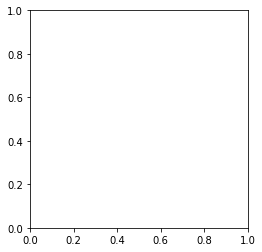

In [86]:
import numpy as np
print(np.argmax(predictions[0]))
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()